### We first need to define probabilistic orthonormal hermite polynomials for standard Gaussian as well as define the corresponding scalar product and triple product

In [22]:
import numpy as np
from scipy.special import hermite
from scipy.integrate import quad ## FUNCTIONS TO IMPLEMENT GAUSS-QUADRATURE
from scipy.integrate import quad_vec ## FUNCTIONS TO IMPLEMENT GAUSS-QUADRATURE
import matplotlib.pyplot as plt
np.random.seed(20)

In [23]:
# Define the orthonormal probabilistic Hermite polynomial
def orthonormal_prob_hermite(n):
    return lambda x: hermite(n)(x/np.sqrt(2)) / np.sqrt(2**n * np.math.factorial(n))

# Define the integrand for scalar product
def scalar_int(i,j):
    return lambda x:orthonormal_prob_hermite(i)(x) * orthonormal_prob_hermite(j)(x) * np.exp(-(x**2/2))/np.sqrt(2*np.pi)

# Define the integrand for triple product
def triple_int(i,j,k):
    return lambda x:orthonormal_prob_hermite(i)(x) * orthonormal_prob_hermite(j)(x)* orthonormal_prob_hermite(k)(x) * np.exp(-(x**2/2))/np.sqrt(2*np.pi)

# Integrate to verify orthonormality
integral1, _ = quad(scalar_int(2,2), -np.inf, np.inf)
integral2, _ = quad(scalar_int(2,3), -np.inf, np.inf)
print(f"The scalar product of the orthonormal probabilistic Hermite polynomials H_2(x) and H_2(x) is approximately {integral1}")
print(f"The scalar product of the orthonormal probabilistic Hermite polynomials H_2(x) and H_3(x) is approximately {integral2}")

The scalar product of the orthonormal probabilistic Hermite polynomials H_2(x) and H_2(x) is approximately 1.0000000000000022
The scalar product of the orthonormal probabilistic Hermite polynomials H_2(x) and H_3(x) is approximately 0.0


In [24]:
from scipy.special import hermitenorm
import math

m, s = 0.06, 0.1
sigma = np.sqrt(np.log(1 + (s/m)**2))
mu    = np.log(m) - 0.5 * sigma**2

# weight of Lognormal(mu,sigma)
lognormal_weight = lambda x: (
    1.0
    / (x * sigma * np.sqrt(2 * np.pi))
    * np.exp( -((np.log(x) - mu)**2) / (2 * sigma**2) )
)

# standardized Hermite basis H_i(ξ),  ξ = (ln x − μ)/σ
def hermite_basis(i):
    He_n = hermitenorm(i)                    # probabilists' Hermite
    norm = math.sqrt(math.factorial(i))      # sqrt(i!) for orthonormality
    return lambda x: He_n((np.log(x) - mu)/sigma) / norm

def scalar_int(i,j):
    return lambda x:hermite_basis(i)(x) * hermite_basis(j)(x) * lognormal_weight(x)
integral1, _ = quad(scalar_int(2,2), 0, np.inf)
integral1

0.9999999999975754

In [25]:
# # Define the orthonormal Hermite polynomials for the lognormal distribution
# def orthonormal_prob_hermite_log(n):
#     return lambda x: hermite(n)(np.log(x)/np.sqrt(2)) / np.sqrt(2**n * np.math.factorial(n))

# # Define the integrand for scalar product for lognormal distribution
# def scalar_int_log(i, j):
#     return lambda x: orthonormal_prob_hermite_log(i)(x) * orthonormal_prob_hermite_log(j)(x) * \
#                      (1/(x * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x)**2) / 2)

# # Define the integrand for triple product for lognormal distribution
# def triple_int_log(i, j, k):
#     return lambda x: orthonormal_prob_hermite_log(i)(x) * orthonormal_prob_hermite_log(j)(x) * \
#                      orthonormal_prob_hermite_log(k)(x) * (1/(x * np.sqrt(2 * np.pi))) * \
#                      np.exp(-(np.log(x)**2) / 2)

# # Example: integrate scalar product of two basis polynomials
# i, j = 0, 1
# integrand = scalar_int_log(i, j)
# result, _ = quad(integrand, 0, np.inf)
# print(f"Scalar product of P_{i} and P_{j} for lognormal distribution: {result}")


##### DEFINING THE KERNEL FUNCTIONS

In [26]:
## defining kernel derivative function

def W2(x, l):
    R = np.abs(x) / l
    a = 1 / l
    mask1 = R <= 1
    mask2 = np.logical_and(R > 1, R < 2)
    result = np.zeros_like(R)
    result[mask1] = (2/3 - R[mask1]**2 + 0.5 * R[mask1]**3) * a
    result[mask2] = ((2 - R[mask2])**3) / 6 * a
    return result

def kernel(x,h):
    rr=np.abs(x)
    q=rr/h
    drx=x/(h*rr)
    alpha_=2/(3*h)
    mask1 = q < 1
    mask2 = np.logical_and(q >= 1, q < 2)
    # print(mask1.shape)
    result = np.zeros_like(q)
    result[mask1]=alpha_*(-3*q[mask1]+2.25*q[mask1]**2)*drx[mask1]
    result[mask2]=-alpha_*0.75*(2-q[mask2])**2*drx[mask2]
    return result


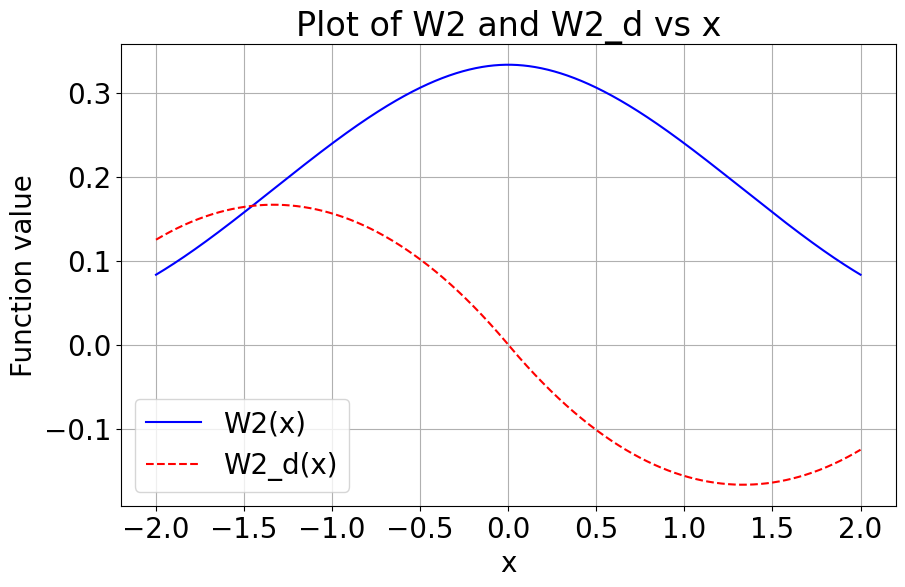

In [27]:
# Define the range of x values
x_values = np.linspace(-2, 2, 1200)

# Define a specific value for l
l = 2

# Calculate W2 and W2_d for each x value
W2_values = W2(x_values, l)
W2_d_values = kernel(x_values, l)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, W2_values, label='W2(x)', color='b')
plt.plot(x_values, W2_d_values, label='W2_d(x)', color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Function value')
plt.title('Plot of W2 and W2_d vs x')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
integral1, _ = quad(lambda x: W2(x-0,0.1), -20, 20)
print(f"The kernel is normalised and hence the integral of it over the domain should be {integral1}")

The kernel is normalised and hence the integral of it over the domain should be 0.999999999970019


In [29]:
### DEFINING CONSTANTS
T = 0.5               # Total time of integration
dt = 0.001          # Time step
N = int(T/dt)       # No of time points
a = 1               # Length of space
J = 512             # Space discretization points
P = 4               # No. of orthonarmal basis that is going to be used
d = 1.0/J
x = np.linspace(0,a,J)           # Discretization points

# Applying Initial condition
c0 = 0.25*np.sin(2*np.pi*x)                
ct = np.zeros((P, J, N+1))

ct[0,:,0] = c0

### FOR SPH

In [30]:
## defining constants
n_particles=J    ###  number of particles
dv = 1/n_particles   ### particle volume
rho0 = 1    ##### defining some random value of intial particle density
m_i = rho0*dv    ###### mass associated with each particle
c = 40/J    ###  radius/cutoff distance 
h = 1.2/J    ### smoothing length

#### creating neigbor list for particle
n_list = [ [] for i in range(n_particles) ]
x_dis = [ [] for i in range(n_particles) ]
for i in range(n_particles):
    for j in range(n_particles):
        if(i>j):
            k=-1
        else:
            k=1
        if(i!=j):
            if(np.linalg.norm(x[i]-x[j])<c):
                n_list[i].append(j)
                x_dis[i].append(x[i]-x[j])
            elif(a+dv-np.linalg.norm(x[i]-x[j])<c):
                n_list[i].append(j)
                x_dis[i].append(k*(a+dv-np.linalg.norm(x[i]-x[j])))
n_list=np.array(n_list)
x_dis=np.array(x_dis)

In [31]:
len(n_list[0])

78

In [32]:
### function to approximate the space derivative using SPH


def SPH(c,h,n_list=n_list):
    cd=np.zeros_like(c)
    for i,neighbors in enumerate(n_list):
        c_i = c[:, i][:, np.newaxis]  # Broadcasting to create the necessary shape
        c_i = np.repeat(c_i, len(neighbors), axis=1)
        c_j=c[:,neighbors]
        cd[:,i] = np.dot((c_i-c_j), -(kernel(x_dis[i], h))) * dv
    return cd

In [33]:
values = np.zeros((P, P))
for i in range(P):
    ϕi = hermite_basis(i)
    for j in range(P):
        ϕj = hermite_basis(j)
        integrand = lambda xi: ϕi(xi) * ϕj(xi) * xi *lognormal_weight(xi)
        values[i, j], _ = quad_vec(integrand, 0, np.inf)
        if abs(values[i, j]) < 1e-15:
            values[i, j] = 0.0


In [34]:
### Solving using predictor-corrector scheme
for n in range(1, N+1):
    c = ct[:, :, n-1]
    cd = SPH(c, h)
    rhs = np.zeros_like(cd)
    for i in range(P):
        for j in range(P):
            rhs[i, :] += cd[j, :] * values[i, j]

    # Predictor step
    ct_pred = ct[:, :, n-1] - rhs * dt

    # Corrector step
    cd_pred = SPH(ct_pred, h)
    rhs_pred = np.zeros_like(cd_pred)
    for i in range(P):
        for j in range(P):
            rhs_pred[i, :] += cd_pred[j, :] * values[i, j]

    ct[:, :, n] = ct[:, :, n-1] - 0.5 * (rhs + rhs_pred) * dt

    print(f"Completed the {n}^th timestep")

Completed the 1^th timestep
Completed the 2^th timestep
Completed the 3^th timestep
Completed the 4^th timestep
Completed the 5^th timestep
Completed the 6^th timestep
Completed the 7^th timestep
Completed the 8^th timestep
Completed the 9^th timestep
Completed the 10^th timestep
Completed the 11^th timestep
Completed the 12^th timestep
Completed the 13^th timestep
Completed the 14^th timestep
Completed the 15^th timestep
Completed the 16^th timestep
Completed the 17^th timestep
Completed the 18^th timestep
Completed the 19^th timestep
Completed the 20^th timestep
Completed the 21^th timestep
Completed the 22^th timestep
Completed the 23^th timestep
Completed the 24^th timestep
Completed the 25^th timestep
Completed the 26^th timestep
Completed the 27^th timestep
Completed the 28^th timestep
Completed the 29^th timestep
Completed the 30^th timestep
Completed the 31^th timestep
Completed the 32^th timestep
Completed the 33^th timestep
Completed the 34^th timestep
Completed the 35^th tim

In [35]:

u_mean=ct[0,:,:]

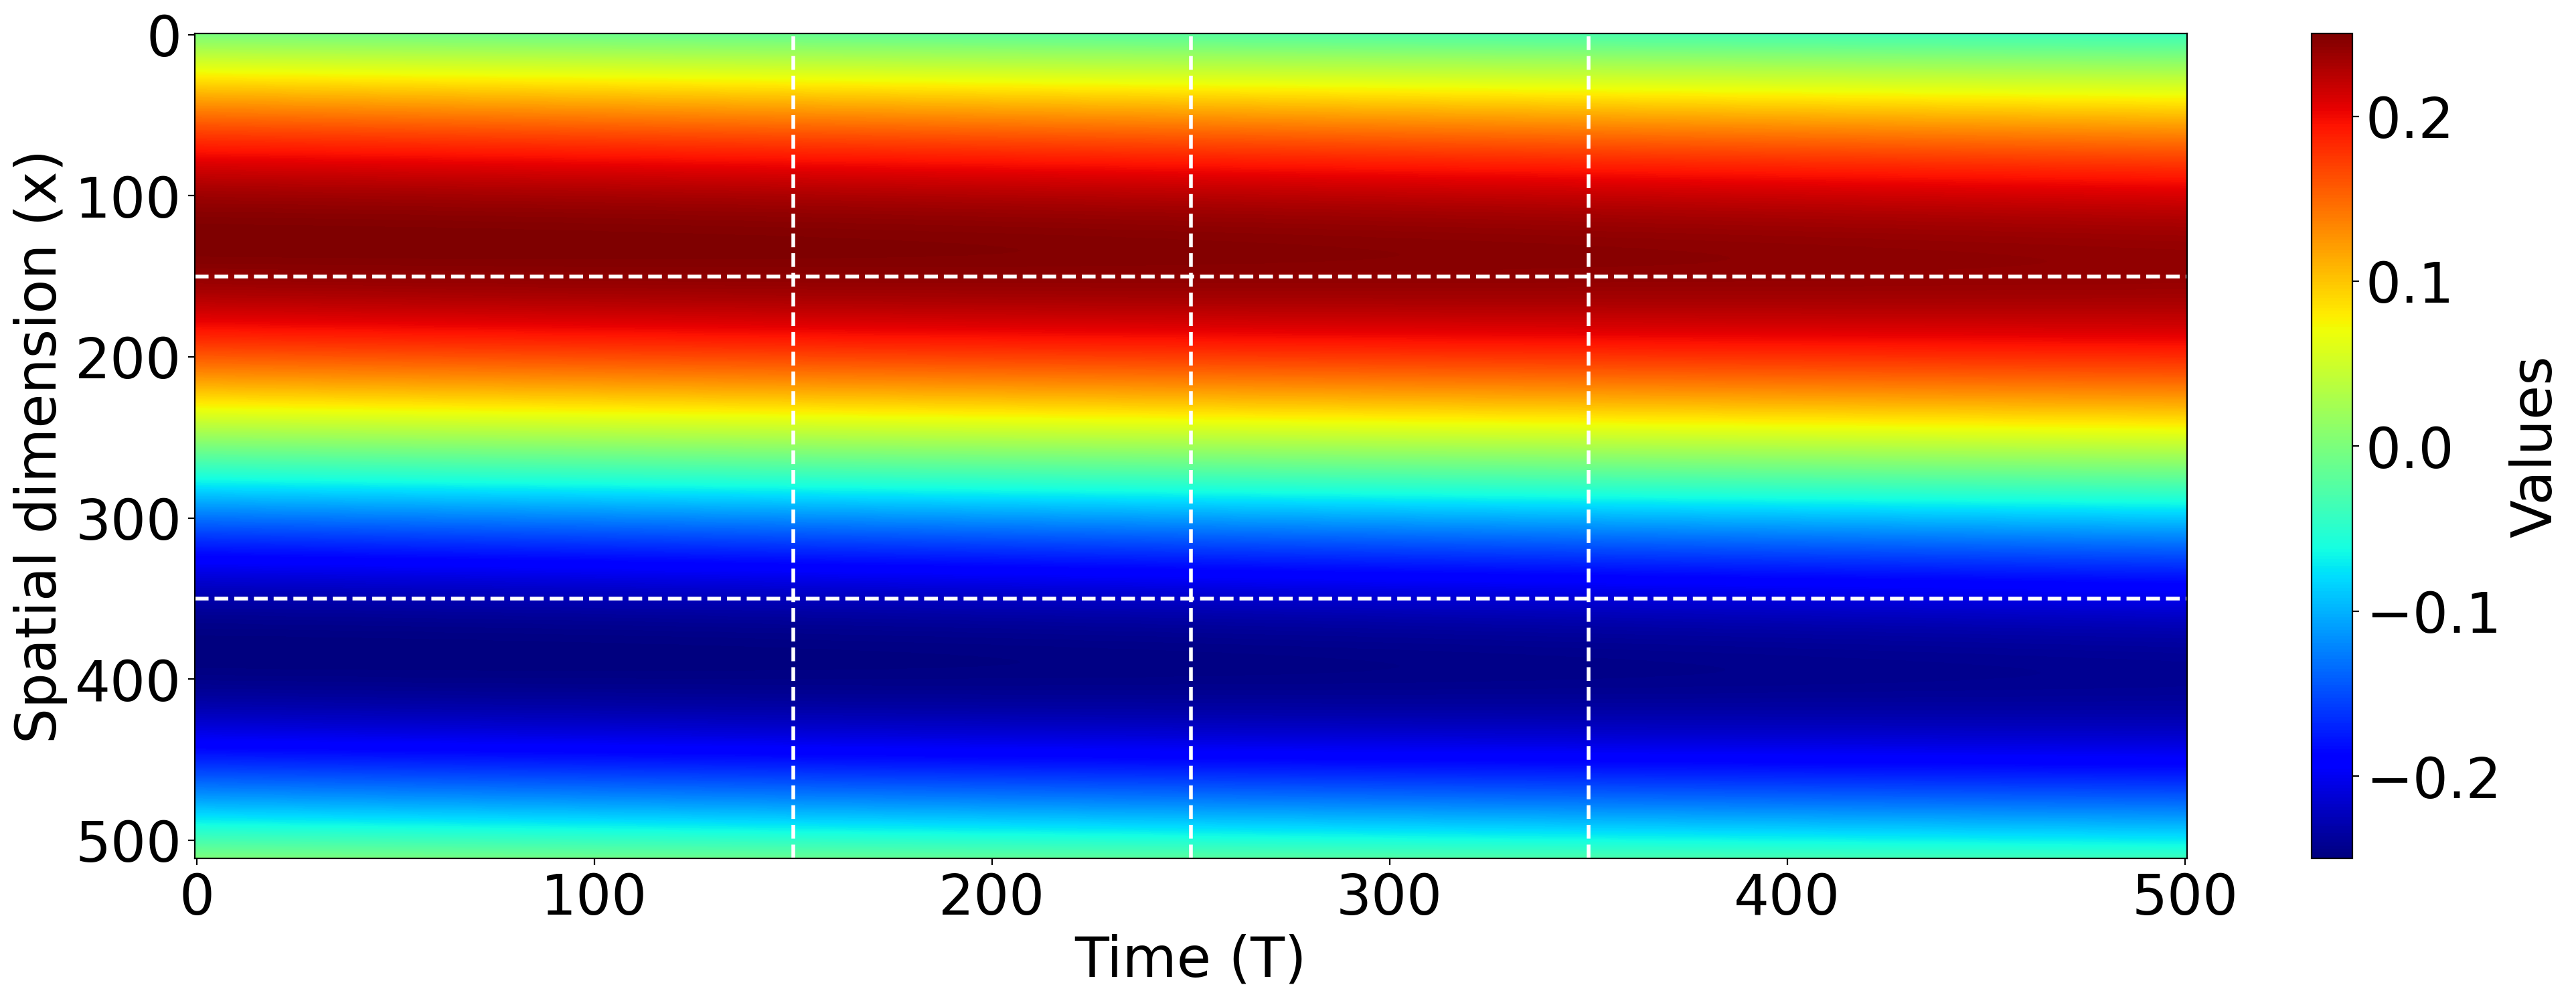

In [36]:
# set font sizes and math font
plt.rcParams['font.size'] = 30
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

# create figure
fig1 = plt.figure(figsize=(24, 8), dpi=200)

# plot heatmap
heatmap = plt.imshow(u_mean, aspect='auto', cmap='jet')

# add vertical lines at t = 150, 250, 350
for t in [150, 250, 350]:
    plt.axvline(x=t, color='white', linestyle='--', linewidth=2)

# add horizontal lines at x = 150, 350
for y in [150, 350]:
    plt.axhline(y=y, color='white', linestyle='--', linewidth=2)

# labels and colorbar
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
cbar = plt.colorbar(heatmap)
cbar.set_label('Values')

plt.show()

In [37]:
#### LET'S CALCULATE variance
def calculate_sq(ct,P):
    f=0
    for i in range(1,P):
        f+=ct[i,:,:]**2
    return  (f)**0.5

u_std=calculate_sq(ct,P)

In [38]:

import pickle
with open('results_exp3_MEAN_mcs.pkl', 'rb') as file:
    mean_mcs=pickle.load(file)
with open('results_exp3_STD_mcs.pkl', 'rb') as file:
    std_mcs=pickle.load(file)

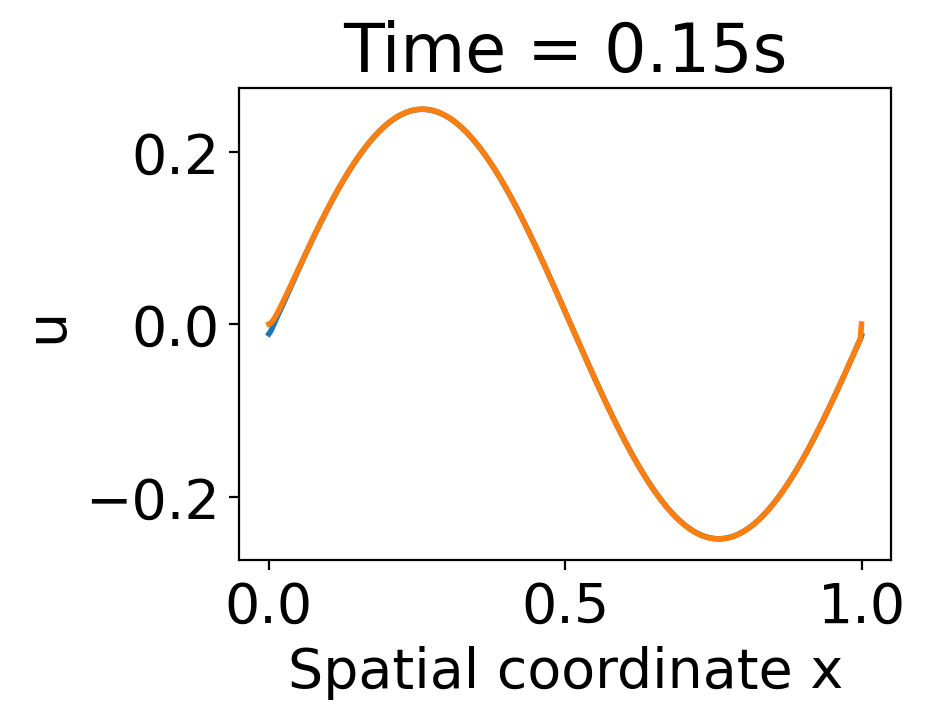

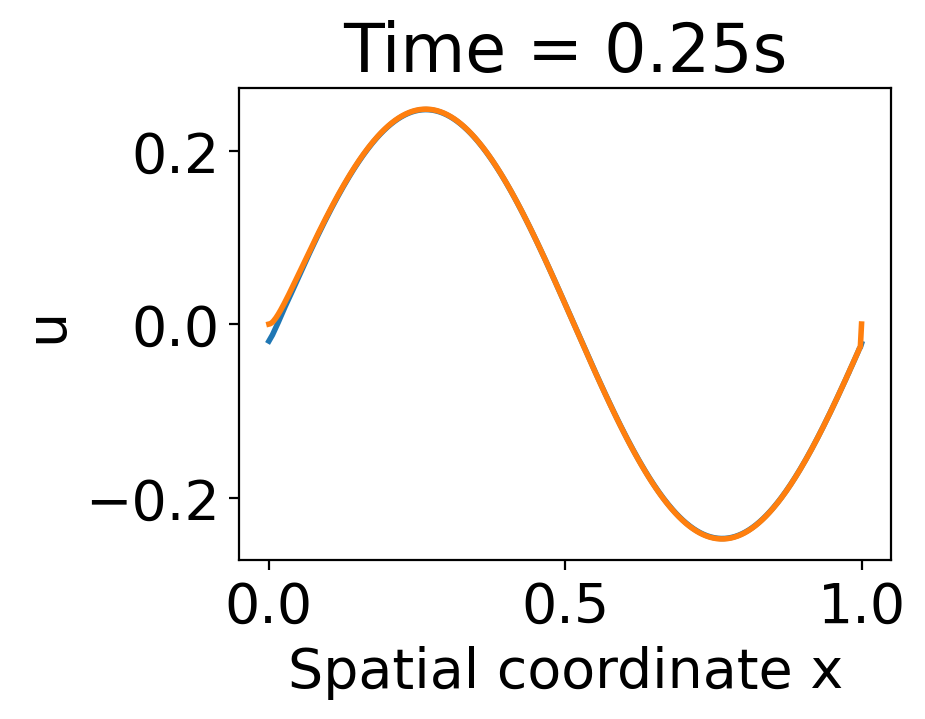

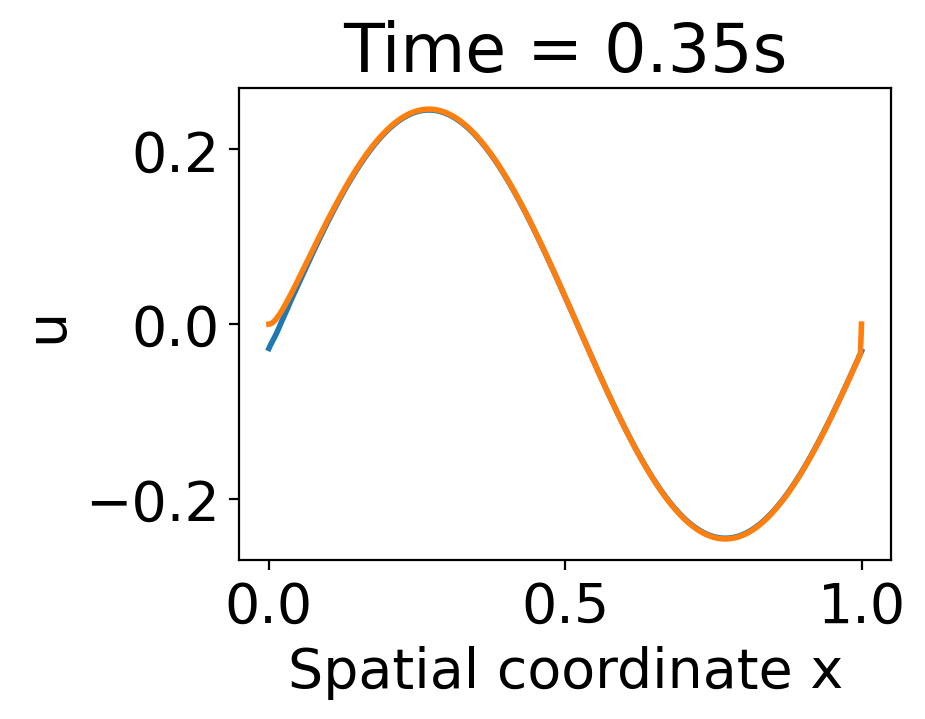

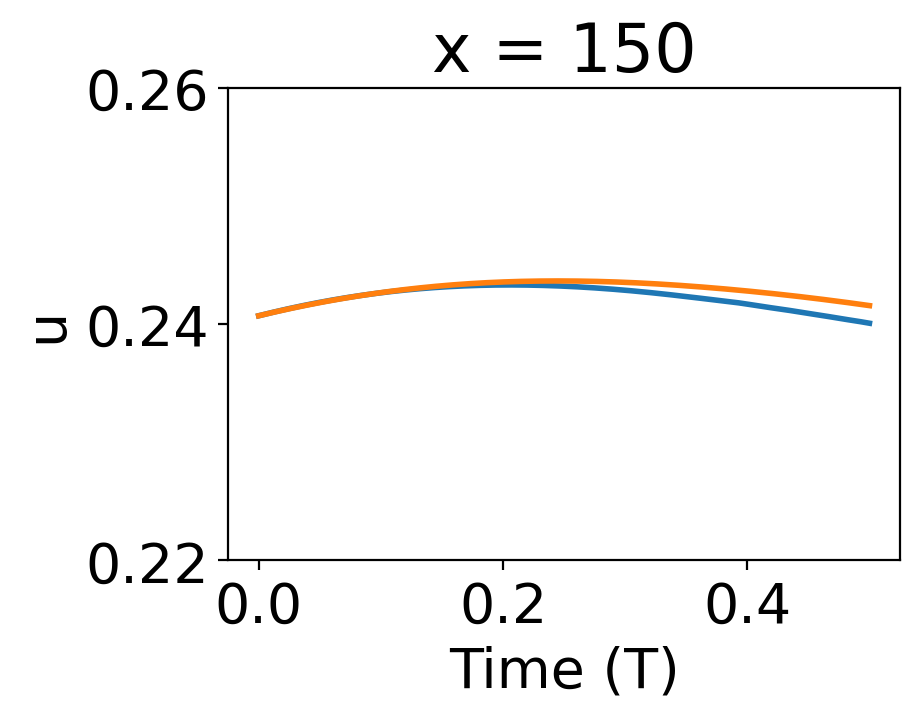

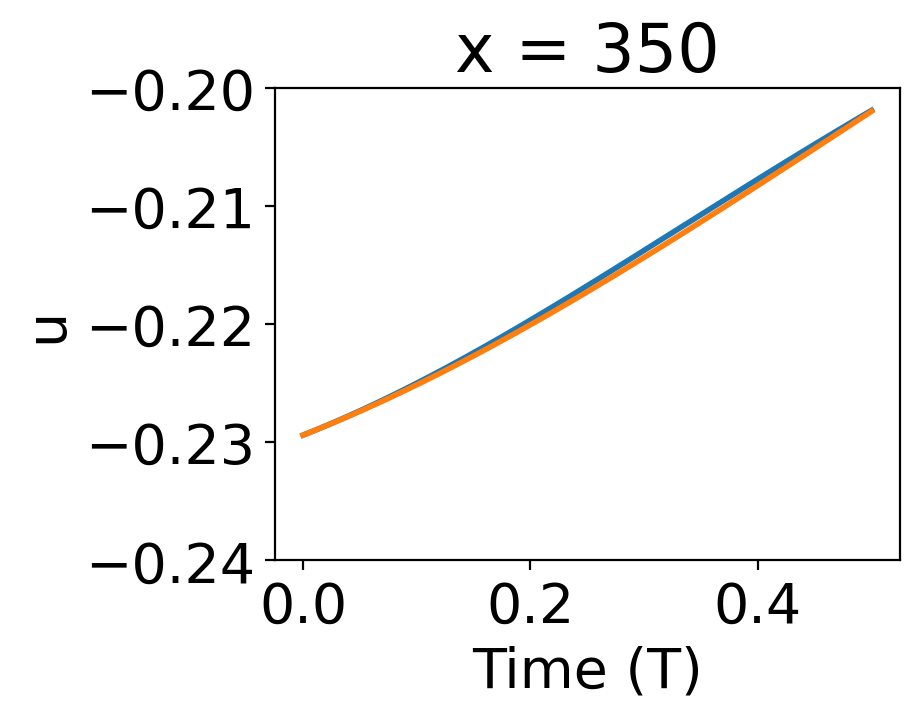

In [44]:

plt.rcParams['font.size'] = 20
# ------------------------------------------------------
# 1) Prepare your data & coordinates
# ------------------------------------------------------
# u_mean: 2D array of shape (nx, nt)
# x:    1D array (length nx) giving the spatial grid coordinates
# t:    1D array (length nt) giving the time grid coordinates

# Example placeholders (replace with your real arrays):
x = np.linspace(0, 1, u_mean.shape[0])
t = np.linspace(0, 0.5, u_mean.shape[1])

# ------------------------------------------------------
# 2) Choose five slices in time and five in space
# ------------------------------------------------------
fixed_times = [150, 250, 350]   # time-coordinates you want to hold fixed
fixed_xs    = [150, 350]   # spatial-coordinates you want to hold fixed

# find the nearest indices in your grid
time_inds = [np.abs(ti) for ti in fixed_times]
x_inds    = [np.abs(xi) for xi in fixed_xs]

# ------------------------------------------------------
# 3) Plot u(x) at each fixed time
# ------------------------------------------------------
for ti, tval in zip(time_inds, fixed_times):
    plt.figure(figsize=(5, 4), dpi=200)
    plt.plot(x, u_mean[:, ti], linewidth=2)
    plt.plot(x, mean_mcs[:, ti], linewidth=2)
    plt.title(f'Time = {tval/1000}s')
    plt.xlabel('Spatial coordinate x')
    plt.ylabel('u')
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------
# 4) Plot u(t) at each fixed spatial location
# ------------------------------------------------------
i=0
for xi, xval in zip(x_inds, fixed_xs):
    plt.figure(figsize=(5, 4), dpi=200)
    plt.plot(t, u_mean[xi, :], linewidth=2)
    plt.plot(t, mean_mcs[xi, :], linewidth=2)
    plt.title(f'x = {xval}')
    plt.xlabel('Time (T)')
    plt.ylabel('u')
    if(i==0):
        plt.ylim(0.220,0.260)
    else:
        plt.ylim(-0.240,-0.20)
        
    i+=1
    plt.tight_layout()
    plt.show()

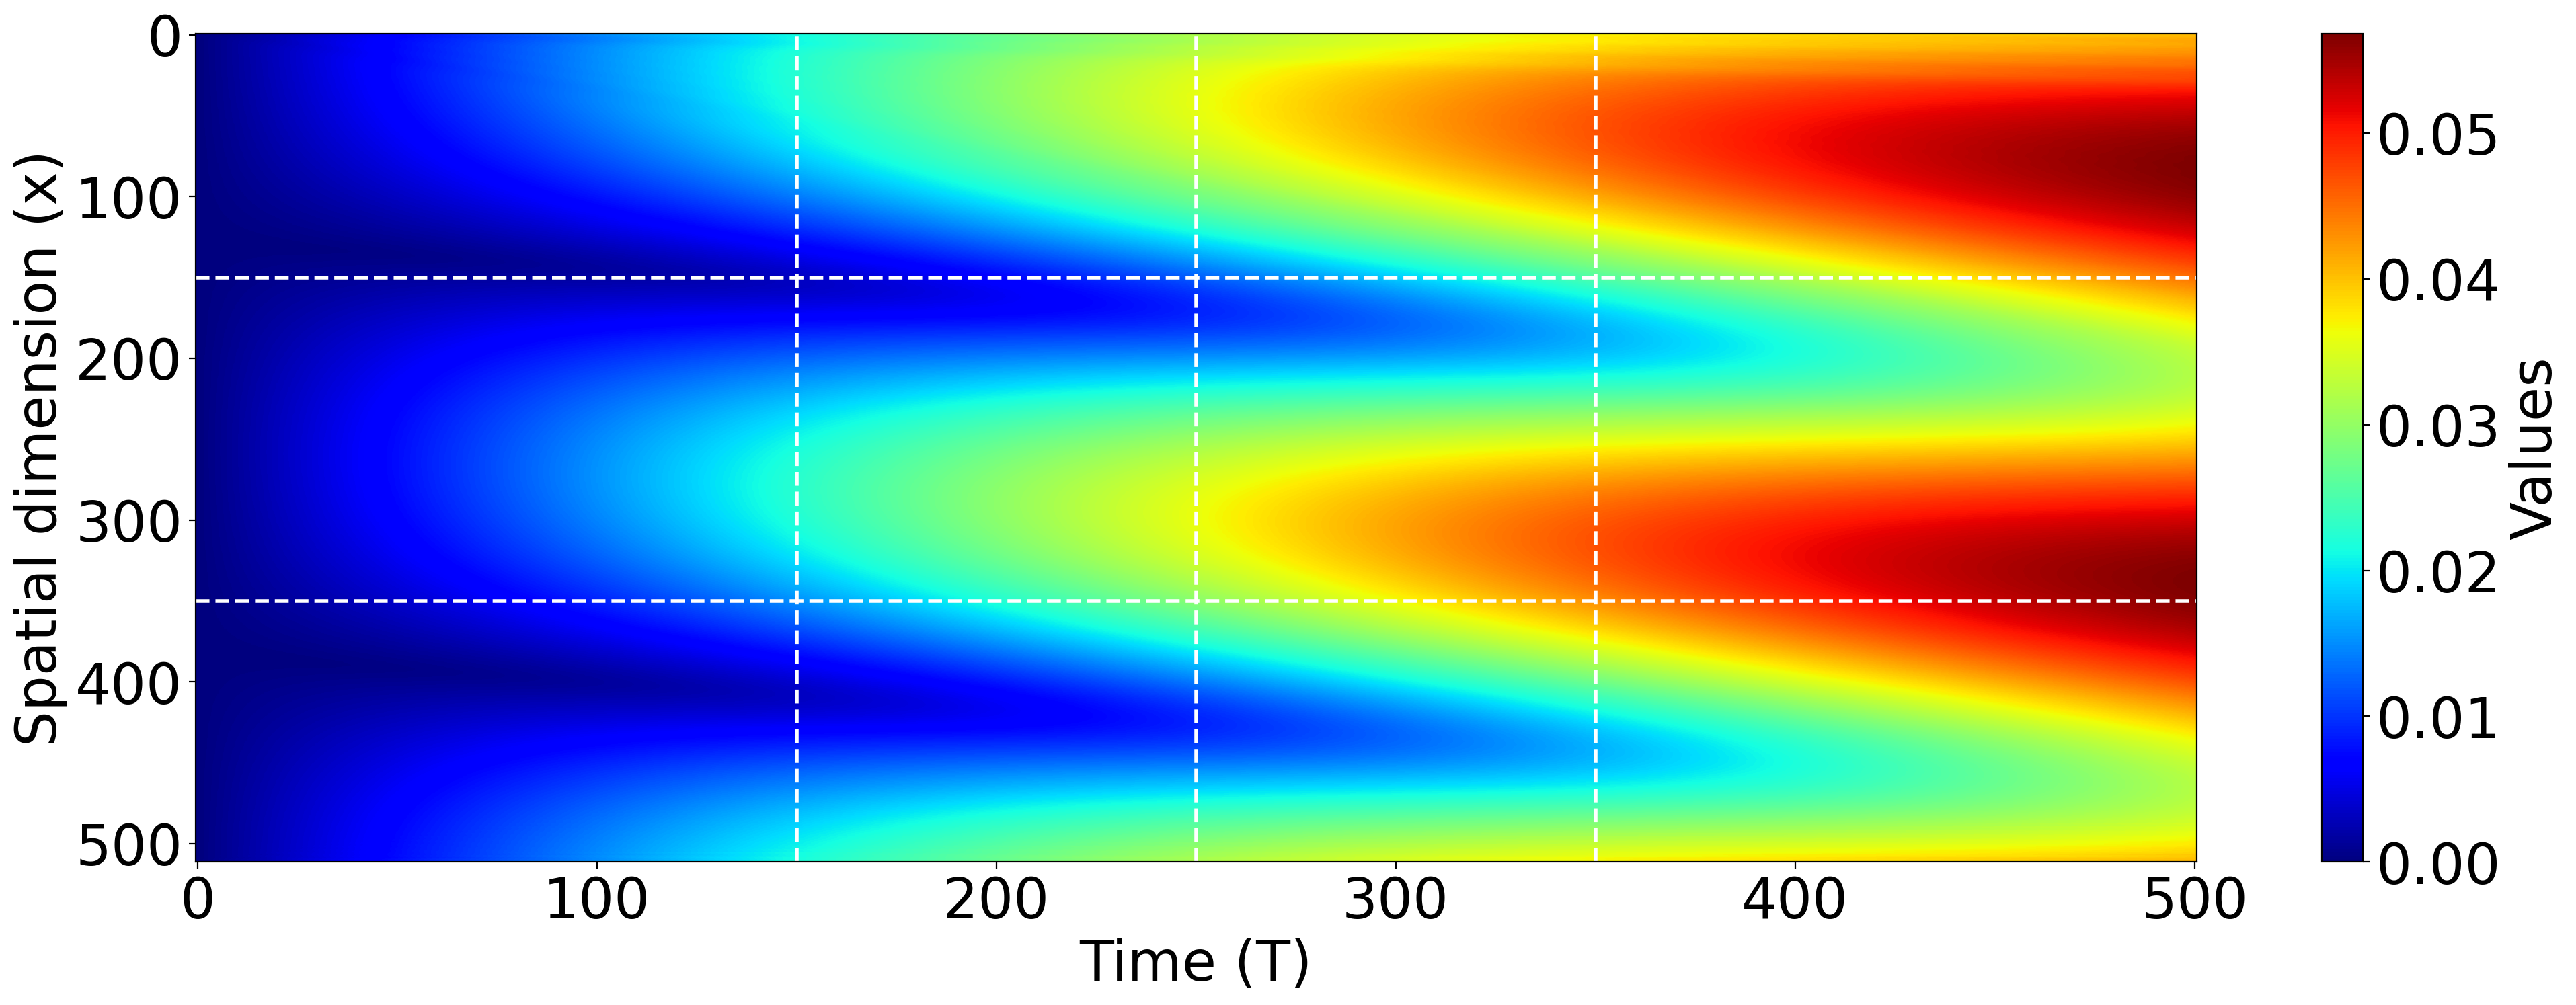

In [40]:
# set font sizes and math font
plt.rcParams['font.size'] = 30
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

# create figure
fig1 = plt.figure(figsize=(24, 8), dpi=200)

# plot heatmap
heatmap = plt.imshow(u_std, aspect='auto', cmap='jet')

# add vertical lines at t = 150, 250, 350
for t in [150, 250, 350]:
    plt.axvline(x=t, color='white', linestyle='--', linewidth=2)

# add horizontal lines at x = 150, 350
for y in [150, 350]:
    plt.axhline(y=y, color='white', linestyle='--', linewidth=2)

# labels and colorbar
plt.xlabel('Time (T)')
plt.ylabel('Spatial dimension (x)')
cbar = plt.colorbar(heatmap)
cbar.set_label('Values')

plt.show()

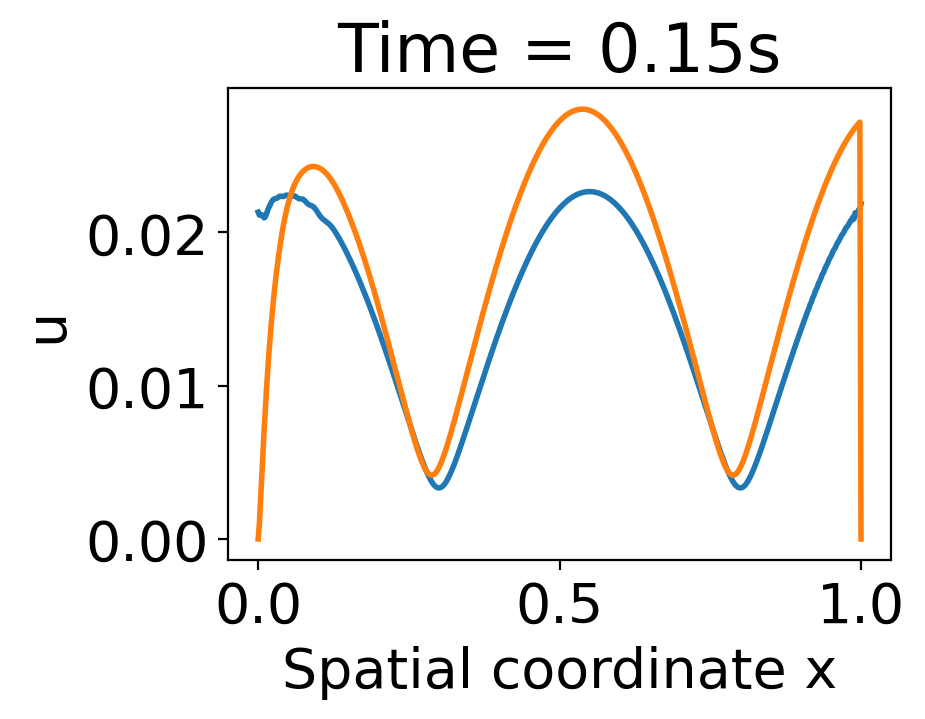

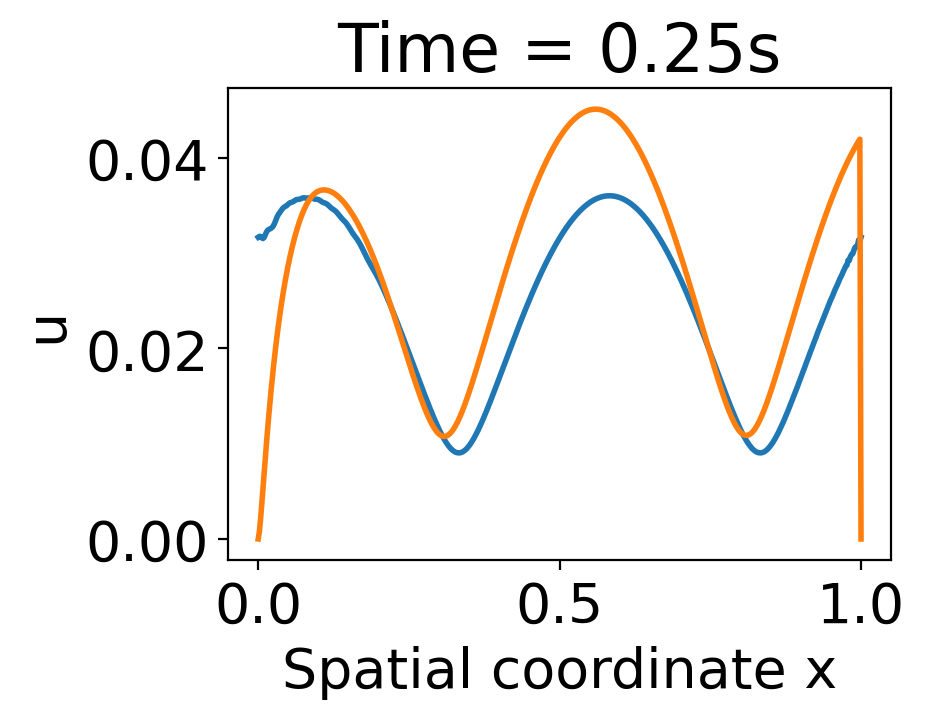

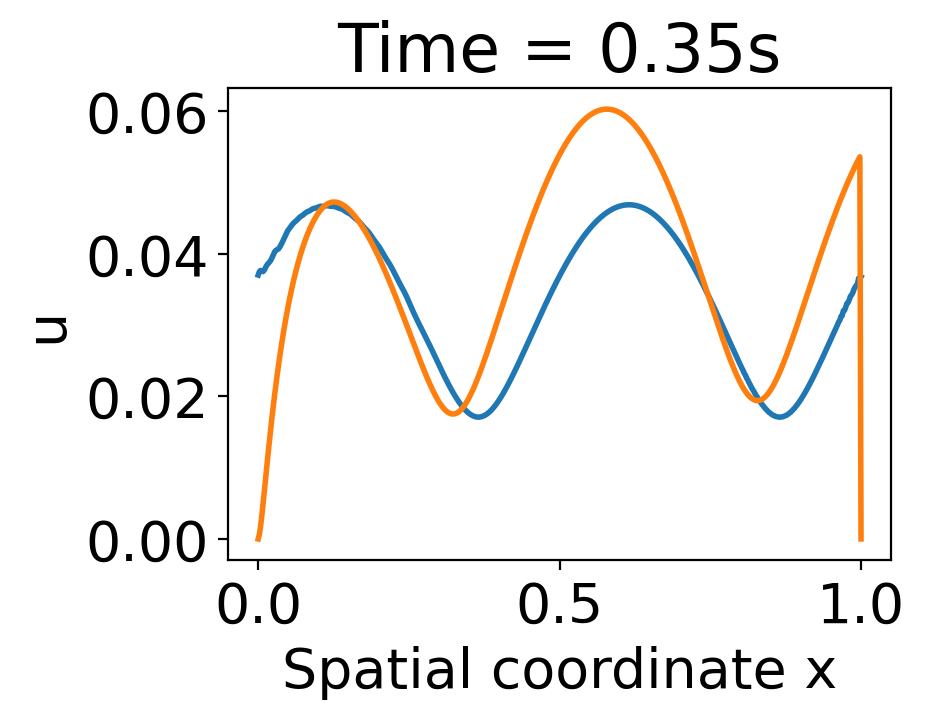

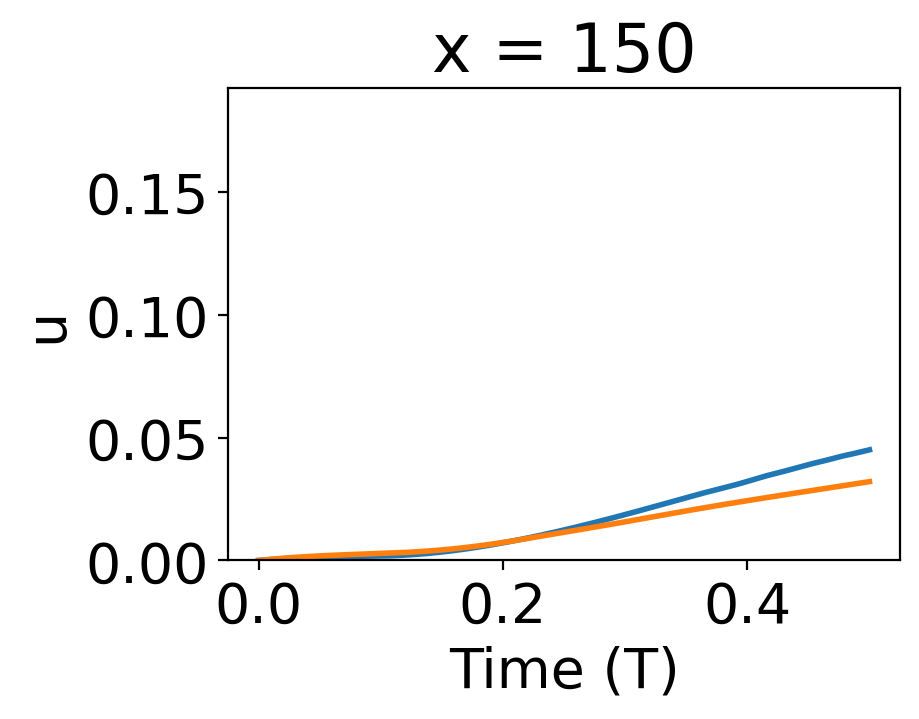

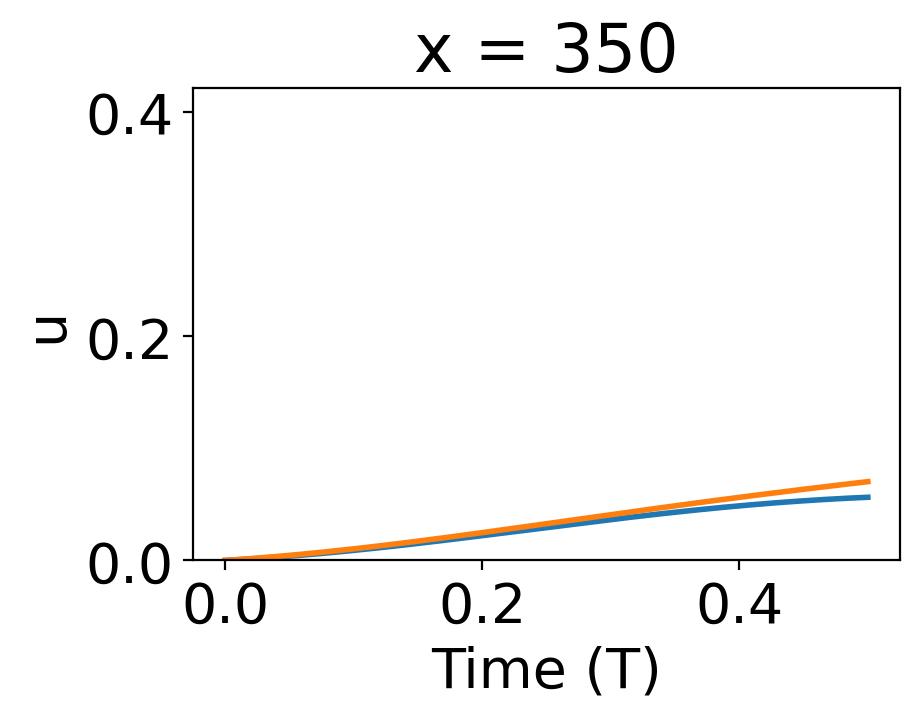

In [45]:
plt.rcParams['font.size'] = 20
# ------------------------------------------------------
# 1) Prepare your data & coordinates
# ------------------------------------------------------
# u_mean: 2D array of shape (nx, nt)
# x:    1D array (length nx) giving the spatial grid coordinates
# t:    1D array (length nt) giving the time grid coordinates

# Example placeholders (replace with your real arrays):
x = np.linspace(0, 1, u_mean.shape[0])
t = np.linspace(0, 0.5, u_mean.shape[1])

# ------------------------------------------------------
# 2) Choose five slices in time and five in space
# ------------------------------------------------------
fixed_times = [150, 250, 350]   # time-coordinates you want to hold fixed
fixed_xs    = [150, 350]   # spatial-coordinates you want to hold fixed

# find the nearest indices in your grid
time_inds = [np.abs(ti) for ti in fixed_times]
x_inds    = [np.abs(xi) for xi in fixed_xs]

# ------------------------------------------------------
# 3) Plot u(x) at each fixed time
# ------------------------------------------------------
for ti, tval in zip(time_inds, fixed_times):
    plt.figure(figsize=(5, 4), dpi=200)
    plt.plot(x, u_std[:, ti], linewidth=2)
    plt.plot(x, std_mcs[:, ti], linewidth=2)
    plt.title(f'Time = {tval/1000}s')
    plt.xlabel('Spatial coordinate x')
    plt.ylabel('u')
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------
# 4) Plot u(t) at each fixed spatial location
# ------------------------------------------------------
for xi, xval in zip(x_inds, fixed_xs):
    plt.figure(figsize=(5, 4), dpi=200)
    plt.plot(t, u_std[xi, :], linewidth=2)
    plt.plot(t, std_mcs[xi, :], linewidth=2)
    plt.title(f'x = {xval}')
    plt.xlabel('Time (T)')
    plt.ylabel('u')
    plt.ylim(np.min(std_mcs[xi, :]), 6*np.max(std_mcs[xi, :]))
    plt.tight_layout()
    plt.show()

In [42]:
import pickle
with open('results_exp3_0.pkl', 'wb') as file:
    pickle.dump(ct, file)